In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

### **LOADING AUDIO DATA**

In [ ]:
classical_wav = "/content/drive/MyDrive/Librosa-Github/classical.00024.wav"
hiphop_wav = "/content/drive/MyDrive/Librosa-Github/hiphop.00024.wav"
metal_wav = "/content/drive/MyDrive/Librosa-Github/metal.00024.wav"

In [ ]:
# load audio files with librosa
classical, sr = librosa.load(classical_wav)
hiphop, _ = librosa.load(hiphop_wav)
metal, _ = librosa.load(metal_wav)

### **1-AMPLITUDE ENVELOPE**












The Amplitude Envelope (AE) aims to extract the maximum amplitude within each frame and string them all together. It is important to remember that the amplitude represents the volume (or loudness) of the signal. First, we split up the signal into its constituent windows and find the maximum amplitude within each window. From there, we plot the maximum amplitude in each window along time.

We can use the AE for onset detection, or the detection of the beginning of a sound. In various speech processing applications this could be someone speaking or external noise, whereas in Music Information Retrieval (MIR) this could be the beginning of a note or instrument.

The main downfall of the AE is that is not as robust to outliers as Root-Mean-Square Energy which will we study soon.

***Here is how we can formalize this concept:***

![image](https://user-images.githubusercontent.com/81585804/128593076-9857dddb-3619-41e8-93f8-422c77900a69.png)


Upon searching for a defined method in Python that could accomplish this task, I could not find it. Therefore, we will define it from scratch as it will be quite easy to do. The other feature extraction methods we will be looking at have already been defined in librosa , so we will be using those functions after formally defining them.

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

def amplitude_envelope(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    amplitude_envelope = []
    
    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length): 
        amplitude_envelope_current_frame = max(signal[i:i+frame_size]) 
        amplitude_envelope.append(amplitude_envelope_current_frame)
    
    return np.array(amplitude_envelope)

In [ ]:
def fancy_amplitude_envelope(signal, frame_size, hop_length):
    """Fancier Python code to calculate the amplitude envelope of a signal with a given frame size."""
    return np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_length)])

In [ ]:
# number of frames in amplitude envelope
ae_classical = amplitude_envelope(classical, FRAME_SIZE, HOP_LENGTH)
len(ae_classical)

1293

In [ ]:
# number of frames in amplitude envelope
ae_metal = amplitude_envelope(metal, FRAME_SIZE, HOP_LENGTH)
len(ae_metal)

1292

In [ ]:
# number of frames in amplitude envelope
ae_hiphop = amplitude_envelope(hiphop, FRAME_SIZE, HOP_LENGTH)
len(ae_hiphop)

1293

###**Visualising amplitude envelope**

In [ ]:
frames = range(len(ae_classical))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

Text(0.5, 1.0, 'Classical')

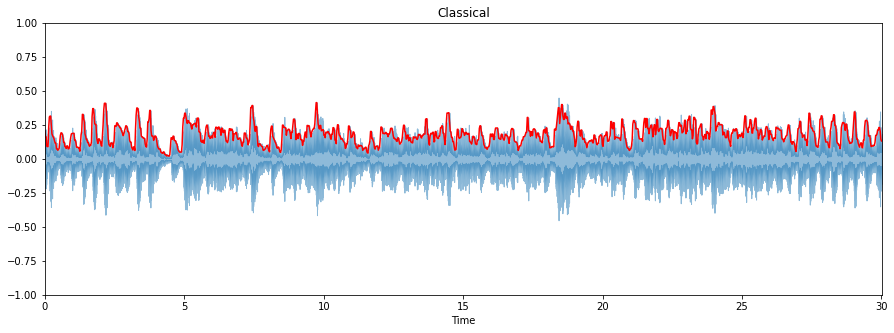

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(classical, alpha=0.5)
plt.plot(t, ae_classical, color="r")
plt.ylim((-1, 1))
plt.title("Classical")

Text(0.5, 1.0, 'Hiphop')

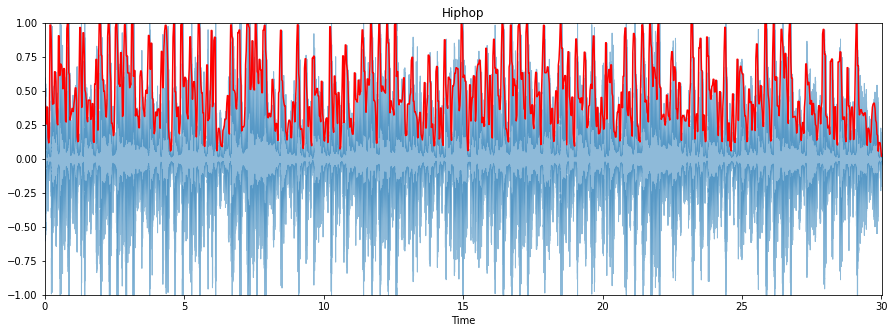

In [ ]:
plt.figure(figsize=(15, ))
librosa.display.waveplot(hiphop, alpha=0.5)
plt.plot(t, ae_hiphop, color="r")
plt.ylim((-1, 1))
plt.title("Hiphop")

###**2-ROOT MEAN SQUARED**

The Root-Mean-Square (RMS) Energy is quite similar to the AE. As opposed to onset detection, however, it attempts to perceive loudness, which can be used for event detection. Furthermore, it is much more robust against outliers, meaning if we segment audio, we can detect new events (such a a new instrument, someone speaking, etc.) much more reliably.

***The formal definition of RMS Energy:***

![image](https://user-images.githubusercontent.com/81585804/128592715-e63c2bc3-920a-4682-b5e2-c973321715c8.png)


As we window across our wave form, we square the amplitudes within the window and sum them up. Once that is complete, we will divide by the frame length, take the square root, and that will be the RMS energy of that window.

`To extract the RMS, we can simply use librosa.feature.rms . `

In [ ]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

In [ ]:
#with librosa
rms_classical = librosa.feature.rms(classical, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_hiphop = librosa.feature.rms(hiphop, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_metal = librosa.feature.rms(metal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
#Also we can write our own function for RMS with the help of from above equation
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [ ]:
frames = range(len(rms_classical))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

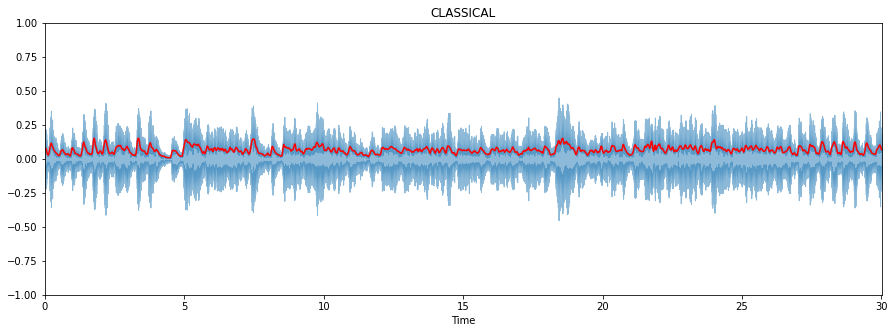

In [ ]:
# rms energy is graphed in red
plt.figure(figsize=(15, 5))
librosa.display.waveplot(classical, alpha=0.5)
plt.plot(t, rms_classical, color="r")
plt.ylim((-1, 1))
plt.title("CLASSICAL")
plt.show()

Text(0.5, 1.0, 'HIPHOP')

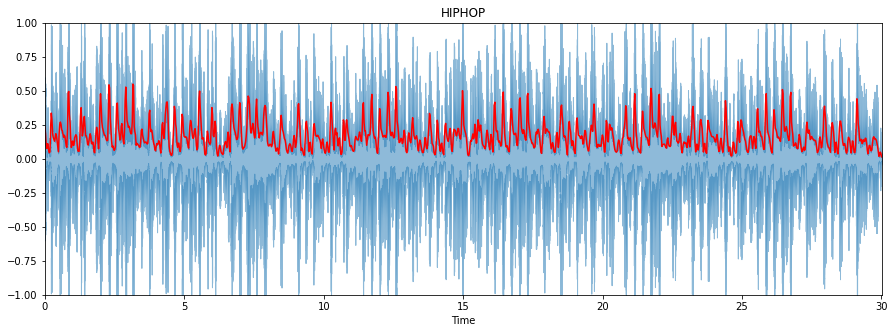

In [ ]:
# rms energy is graphed in red
plt.figure(figsize=(15, 5))
librosa.display.waveplot(hiphop, alpha=0.5)
plt.plot(t, rms_hiphop, color="r")
plt.ylim((-1, 1))
plt.title("HIPHOP")

Text(0.5, 1.0, 'METAL')

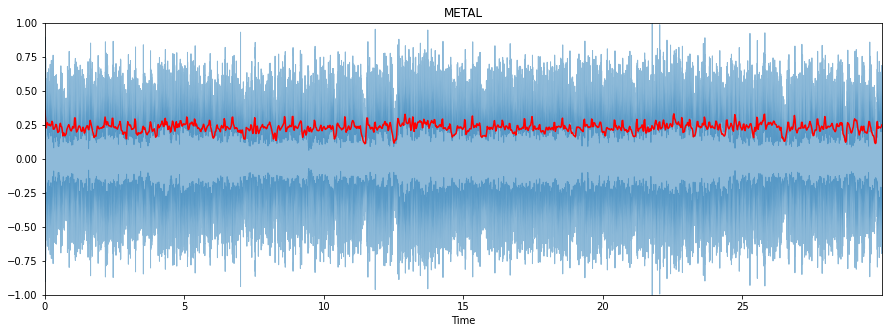

In [ ]:
# rms energy is graphed in red
librosa.display.waveplot(metal, alpha=0.5)
plt.plot(t, rms_metal, color="r")
plt.ylim((-1, 1))
plt.title("METAL")

###**3-ZERO CROSSING RATE**

The Zero-Crossing Rate (ZCR) aims to study the the rate in which a signal’s amplitude changes sign within each frame. Compared to the previous two features, this one is quite simple to extract.


***The formal definition of ZCR is the following:***

![image](https://user-images.githubusercontent.com/81585804/128592896-577f31b7-4a05-4ec8-be6a-195c392425f7.png)



It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

![image](https://user-images.githubusercontent.com/81585804/128627294-a259a935-bbc9-4375-bcb1-c19f58b4e70f.png)


`Using librosa , we can extract the ZCR using librosa.feature.zero_crossing_rate .`

In [ ]:
zcr_classical = librosa.feature.zero_crossing_rate(classical, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_hiphop = librosa.feature.zero_crossing_rate(hiphop, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_metal = librosa.feature.zero_crossing_rate(metal, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
zcr_classical.size

1293

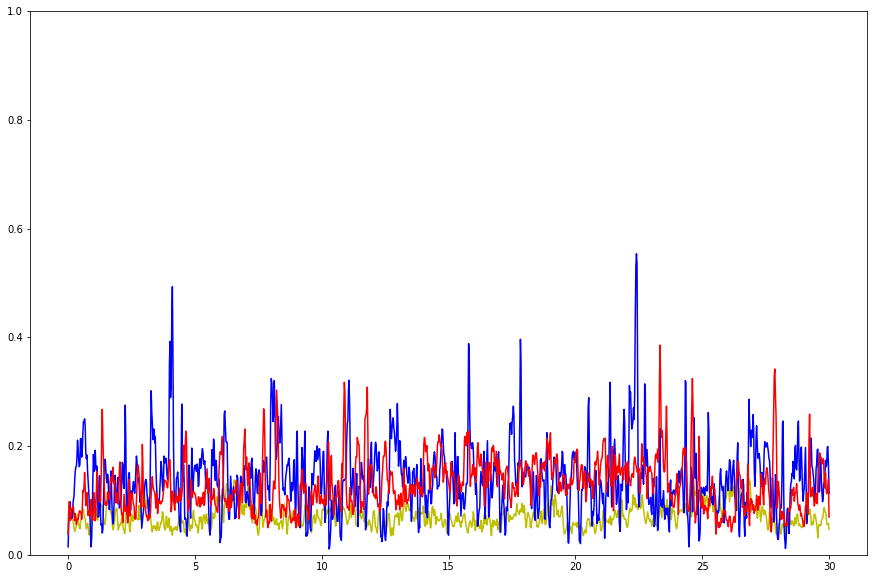

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(t, zcr_classical, color="y")
plt.plot(t, zcr_hiphop, color="b")
plt.plot(t, zcr_metal, color="r")
plt.ylim(0, 1)
plt.show()